In [12]:
import pandas as pd

In [13]:
df=pd.read_excel(r"C:\Users\delll\Desktop\Python\DataSets\Datasets_Forecasting\Airlines-Data.xlsx")
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [14]:
df.shape

(96, 2)

In [4]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [5]:
df["Month"].dt.year

0     1995
1     1995
2     1995
3     1995
4     1995
      ... 
91    2002
92    2002
93    2002
94    2002
95    2002
Name: Month, Length: 96, dtype: int64

In [15]:
#To extract the month
df["Month"].dt.month

0      1
1      2
2      3
3      4
4      5
      ..
91     8
92     9
93    10
94    11
95    12
Name: Month, Length: 96, dtype: int64

In [16]:
df["Years"]=df["Month"].dt.year
df["Months"]=df["Month"].dt.month
df.drop("Month",axis=1,inplace=True)

In [17]:
df.head()

,Passengers,Years,Months
0,112,1995,1
1,118,1995,2
2,132,1995,3
3,129,1995,4
4,121,1995,5


In [18]:
df.dtypes

Passengers    int64
Years         int64
Months        int64
dtype: object

In [23]:
df['Months']=pd.to_datetime(df['Months'],format='%m').dt.month_name().str.slice(stop=3)
df=df[['Months','Passengers']] 
#airlines["period"] = airlines["Months"].astype(str) + airlines["Year"].astype(str)        

In [24]:
df.head()

,Months,Passengers
0,Jan,112
1,Feb,118
2,Mar,132
3,Apr,129
4,May,121


In [25]:
a=df["Months"][0]
a[0:3]

'Jan'

In [26]:
for i in range(96):
    a=df["Months"][i]
    df["Months"][i]=a[0:3]


C:\Users\delll\AppData\Local\Temp\ipykernel_12776\3430738459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Months"][i]=a[0:3]


In [27]:
df

,Months,Passengers
0,Jan,112
1,Feb,118
2,Mar,132
3,Apr,129
4,May,121
...,...,...
91,Aug,405
92,Sep,355
93,Oct,306
94,Nov,271


In [29]:
#for all these months create dummy variables
Months_dummies=pd.DataFrame(pd.get_dummies(df['Months']))
Months_dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
## now let us concatenate these dummy values to dataframe
airlines1=pd.concat([df,Months_dummies],axis=1)
airlines1.head()

,Months,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan,112,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb,118,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar,132,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr,129,1,0,0,0,0,0,0,0,0,0,0,0
4,May,121,0,0,0,0,0,0,0,0,1,0,0,0


In [32]:
# similarly we need to create column t
import numpy as np
airlines1['t']=np.arange(1,97)
airlines1['t_squared']=airlines1['t']*airlines1['t']
airlines1['log_Passengers']=np.log(airlines1['Passengers'])

In [45]:
airlines1.head()

,Months,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,Jan,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,Feb,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,Mar,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,Apr,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,May,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


<Axes: >

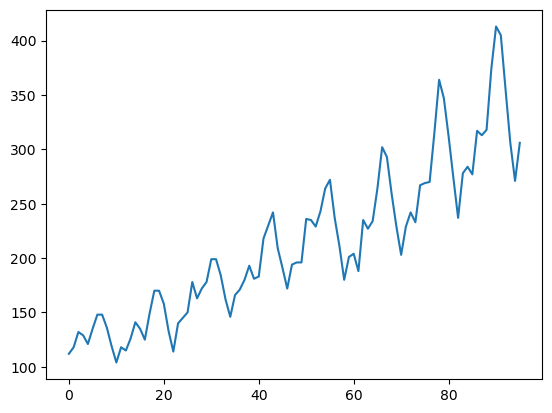

In [33]:
#Now let us check the visuals of the passengers
airlines1.Passengers.plot()
#You will get increasing trend with gradual  increasing


In [34]:
# we have to forecast Passengers in next 12 months,hence horizon=12,even 
#season=12,so validating data will be 12 and training will 96-12=84
Train=airlines1.head(84)
Test=airlines1.tail(12)

In [35]:
# Now let us apply linear regression
import statsmodels.formula.api as smf
##Linear model
linear_model=smf.ols("Passengers~t",data=Train).fit()

In [44]:
from sklearn.metrics import r2_score
pred_linear=pd.Series(linear_model.predict(Test['t']))
rmse_linear=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear


53.199236534802715

In [46]:
##Quadratic model
Quad=smf.ols("Passengers~t+t_squared",data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t", "t_squared"]]))
rmse_Quad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))

rmse_Quad

48.051888979330975